In [55]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import os,sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from collections import Counter

sns.set()

In [56]:
df1= pd.read_csv(r"C:\Users\DELL\Downloads\indian_liver_patient (1).csv")

In [57]:
df2= pd.read_csv(r"C:\liver disease\Liver Patient Dataset (LPD)_train.csv" ,encoding = 'latin1' )

In [58]:
df2.columns =df1.columns 

In [59]:
DF= pd.concat([df1,df2], axis=0, ignore_index=True)
DF.to_pickle(r"D:\fatttyliverdataset\livermerged.pkl")

In [60]:
DF.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1
5,46.0,Male,1.8,0.7,208.0,19.0,14.0,7.6,4.4,1.30,1
6,26.0,Female,0.9,0.2,154.0,16.0,12.0,7.0,3.5,1.00,1
7,29.0,Female,0.9,0.3,202.0,14.0,11.0,6.7,3.6,1.10,1
8,17.0,Male,0.9,0.3,202.0,22.0,19.0,7.4,4.1,1.20,2
9,55.0,Male,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.00,1


In [61]:
DF.shape

(31274, 11)

In [62]:
DF.isnull().sum()

Age                             2
Gender                        902
Total_Bilirubin               648
Direct_Bilirubin              561
Alkaline_Phosphotase          796
Alamine_Aminotransferase      538
Aspartate_Aminotransferase    462
Total_Protiens                463
Albumin                       494
Albumin_and_Globulin_Ratio    563
Dataset                         0
dtype: int64

In [63]:
DF.dropna(inplace=True)

In [64]:
DF.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [65]:
DF.shape

(27737, 11)

In [66]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27737 entries, 0 to 31273
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         27737 non-null  float64
 1   Gender                      27737 non-null  object 
 2   Total_Bilirubin             27737 non-null  float64
 3   Direct_Bilirubin            27737 non-null  float64
 4   Alkaline_Phosphotase        27737 non-null  float64
 5   Alamine_Aminotransferase    27737 non-null  float64
 6   Aspartate_Aminotransferase  27737 non-null  float64
 7   Total_Protiens              27737 non-null  float64
 8   Albumin                     27737 non-null  float64
 9   Albumin_and_Globulin_Ratio  27737 non-null  float64
 10  Dataset                     27737 non-null  int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.5+ MB


In [67]:
numerical_columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin', 
                     'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 
                     'Aspartate_Aminotransferase', 'Total_Protiens', 
                     'Albumin', 'Albumin_and_Globulin_Ratio']

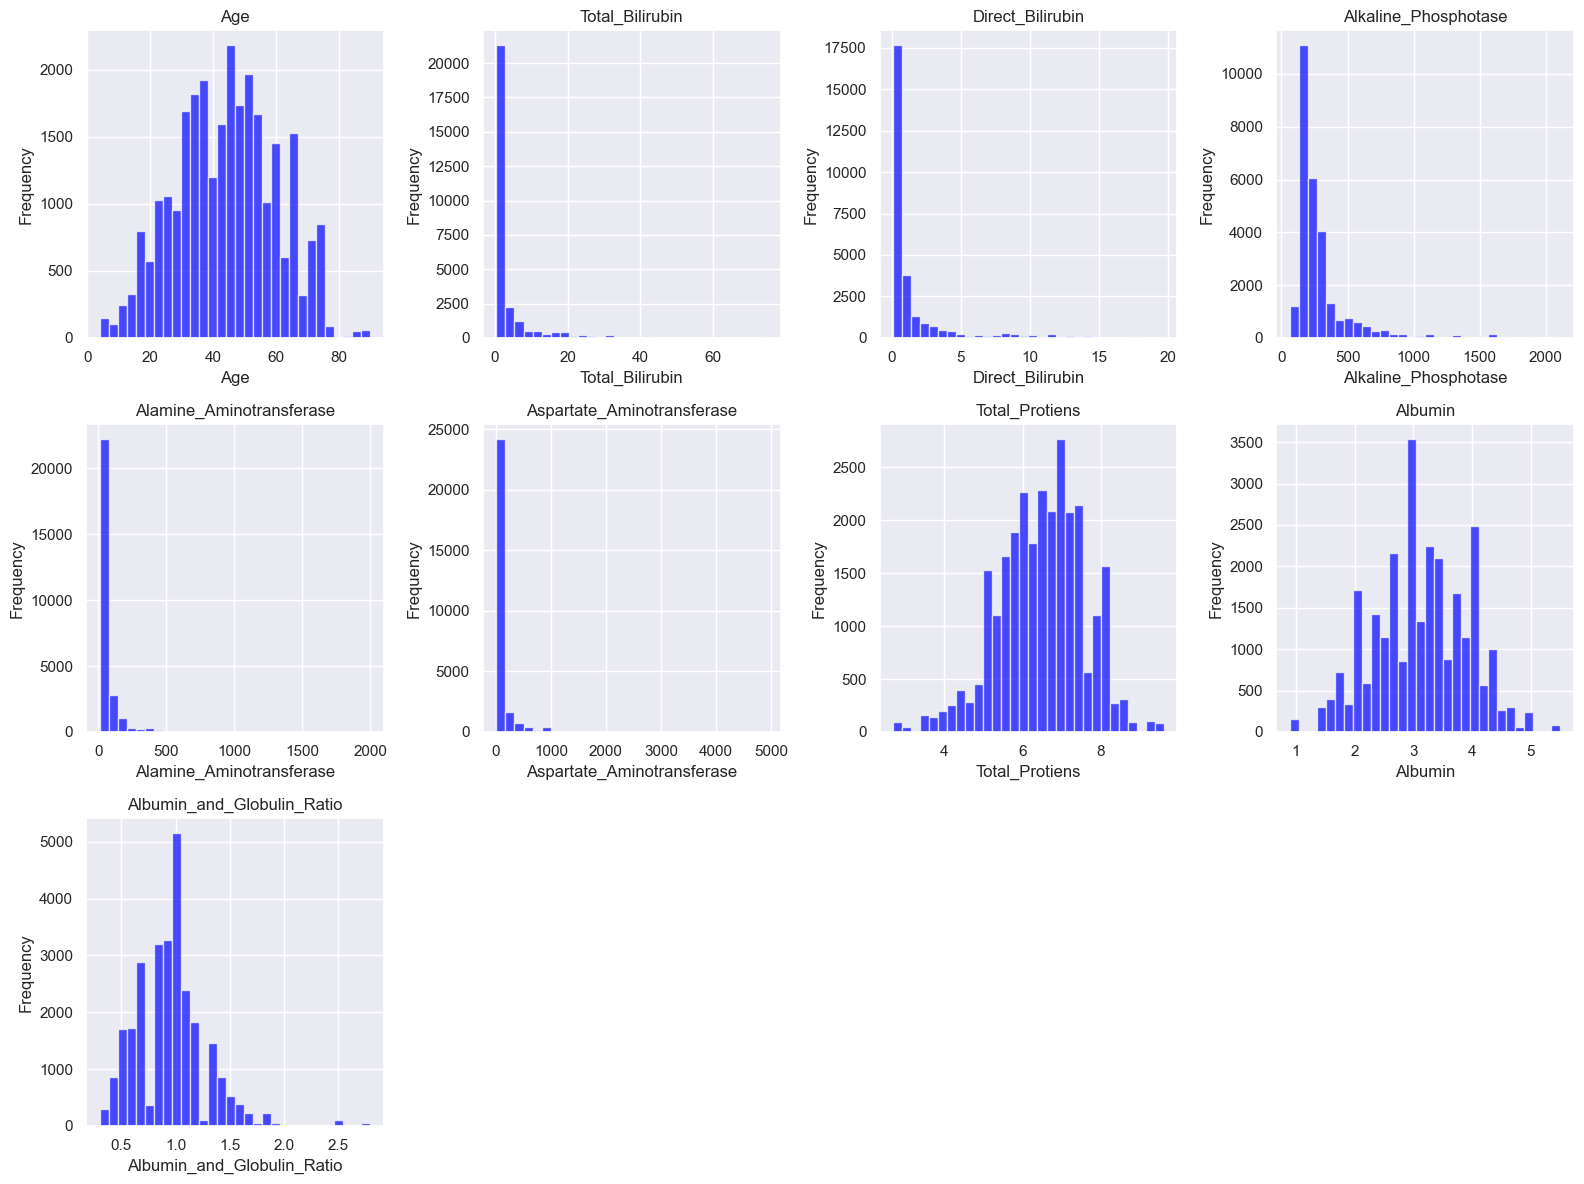

In [68]:
# Plot histograms for all numerical columns
plt.figure(figsize=(16, 12)) 
for i, column in enumerate(numerical_columns, 1):  
    plt.subplot(3, 4, i)  
    plt.hist(DF[column], bins=30, color='blue', alpha=0.7)  
    plt.title(column)  
    plt.xlabel(column) 
    plt.ylabel("Frequency") 

plt.tight_layout()  
plt.show()

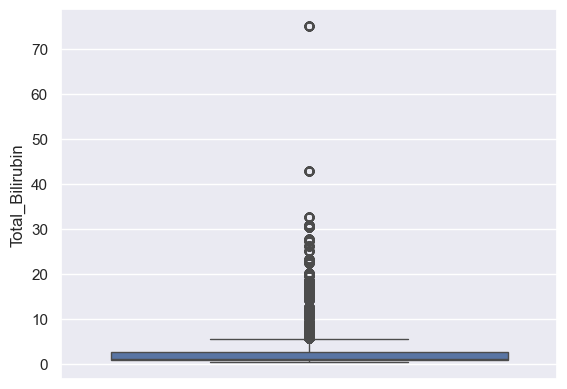

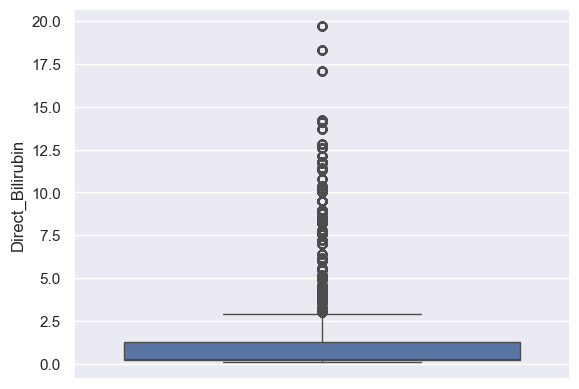

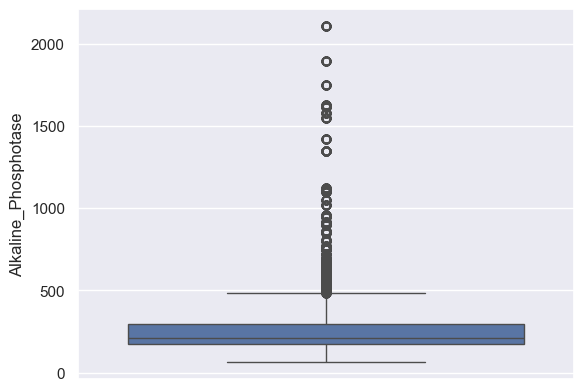

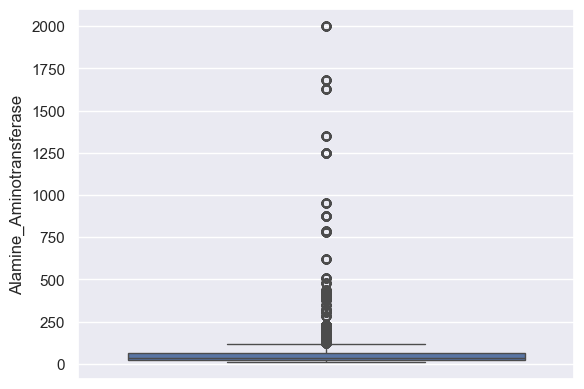

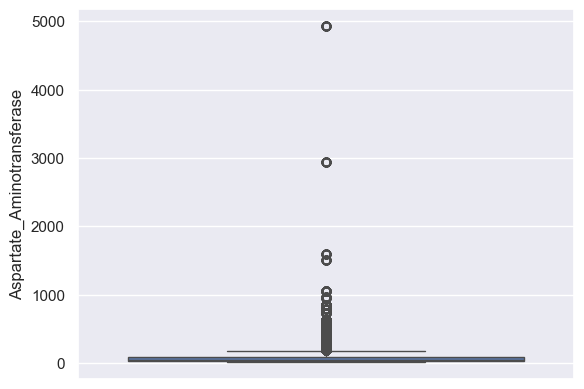

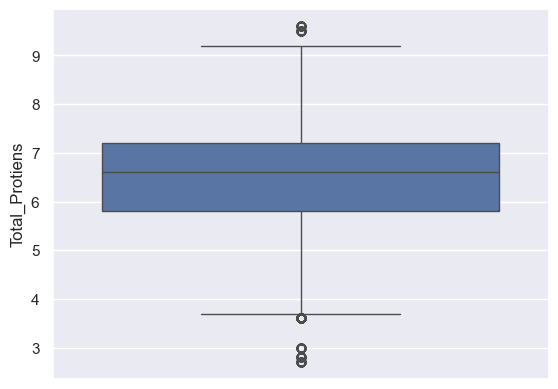

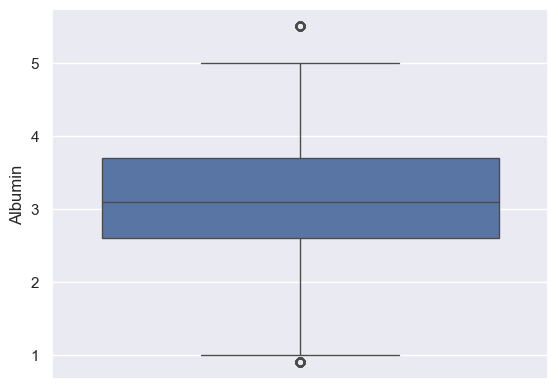

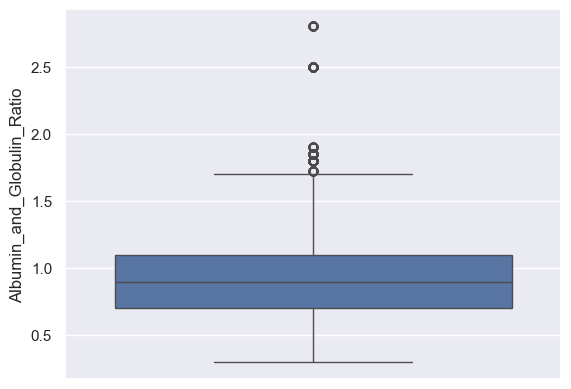

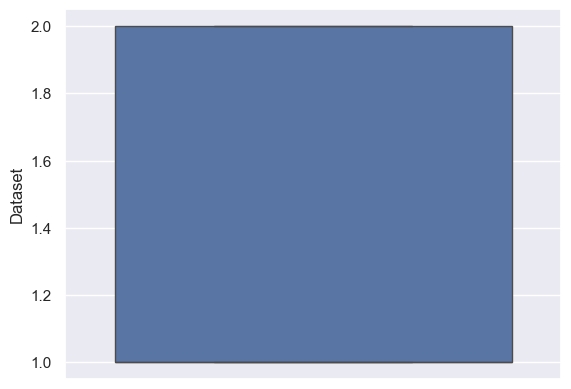

In [69]:
def boxplots(col):
    sns.boxplot(DF[col])
    plt.show()
    
for i in list(DF.select_dtypes(exclude=["object"]).columns)[1:]: 
    boxplots(i)

In [70]:
Q1 = DF[numerical_columns].quantile(0.25) # Select only numerical columns
Q3 = DF[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [71]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [72]:
lower_bound

Age                            0.00
Total_Bilirubin               -2.05
Direct_Bilirubin              -1.45
Alkaline_Phosphotase          -9.50
Alamine_Aminotransferase     -35.50
Aspartate_Aminotransferase   -67.00
Total_Protiens                 3.70
Albumin                        0.95
Albumin_and_Globulin_Ratio     0.10
dtype: float64

In [73]:
upper_bound

Age                            88.00
Total_Bilirubin                 5.55
Direct_Bilirubin                2.95
Alkaline_Phosphotase          482.50
Alamine_Aminotransferase      120.50
Aspartate_Aminotransferase    181.00
Total_Protiens                  9.30
Albumin                         5.35
Albumin_and_Globulin_Ratio      1.70
dtype: float64

In [74]:
print(DF.columns)  # Print the column names

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')


In [75]:
for col in DF.select_dtypes(include=['float64', 'int64']).columns:
    if col != 'Dataset':  # Exclude the 'Dataset' column
        DF[col] = DF[col].clip(lower=lower_bound[col], upper=upper_bound[col])

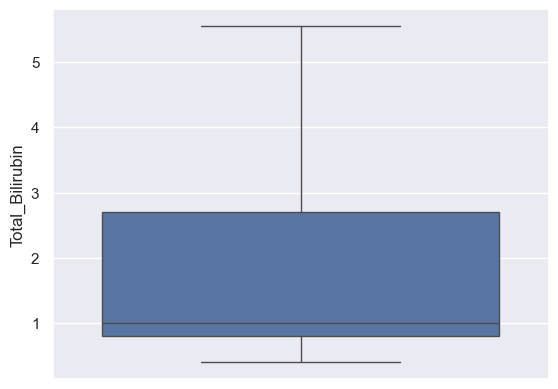

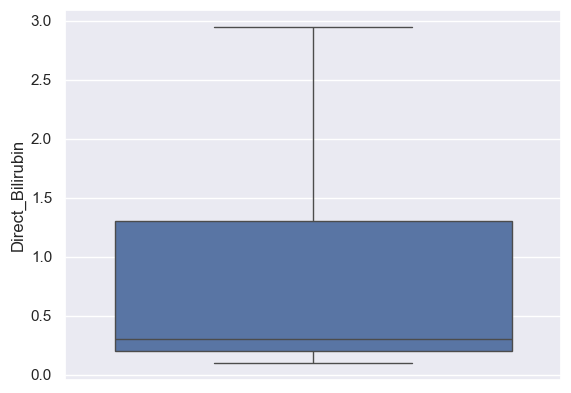

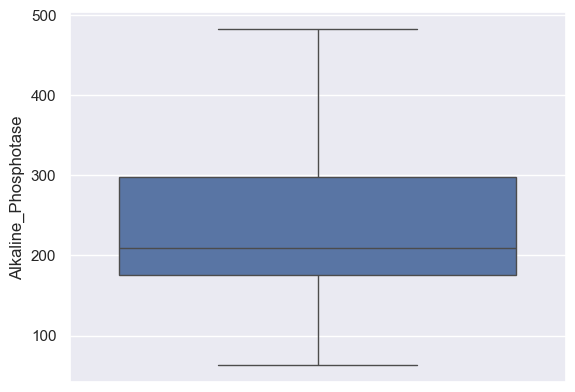

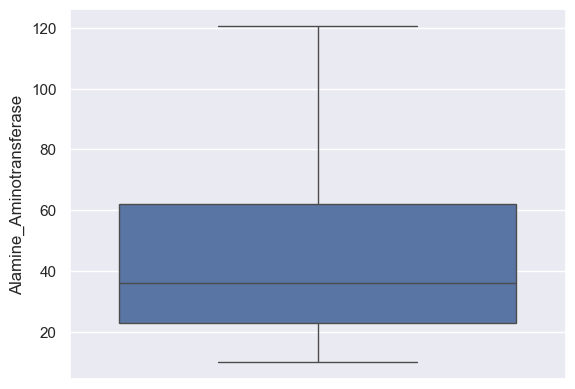

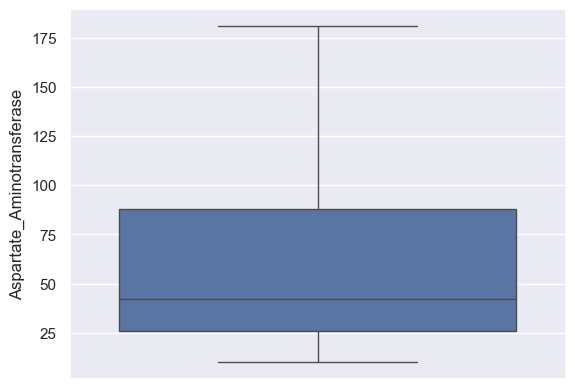

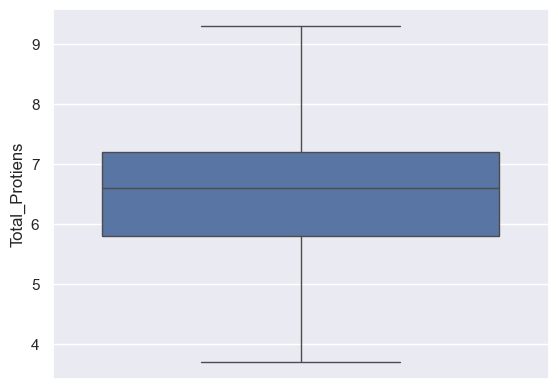

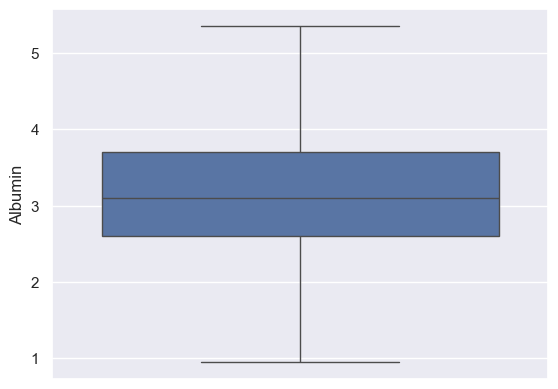

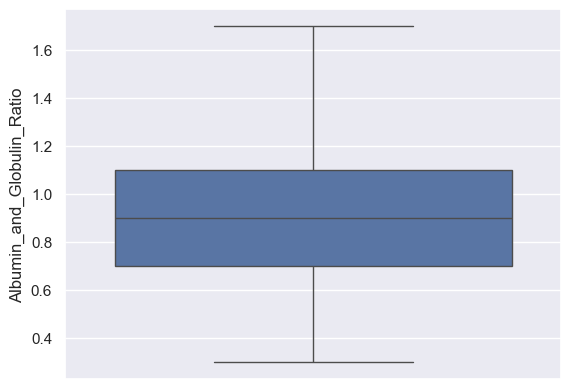

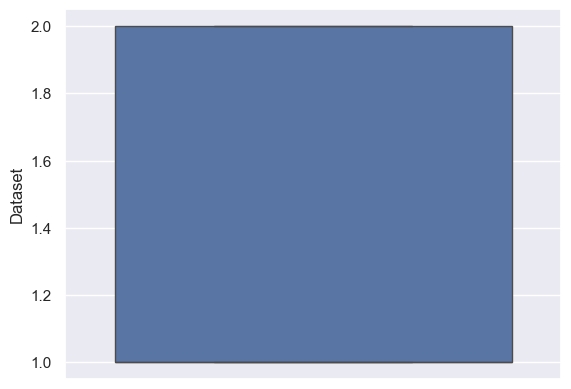

In [76]:
def boxplots(col):
    sns.boxplot(DF[col])
    plt.show()
    
for i in list(DF.select_dtypes(exclude=["object"]).columns)[1:]: 
    boxplots(i)

In [77]:
DF = pd.get_dummies(DF, columns=['Gender'], drop_first=True) # drop_first avoids multicollinearity
DF

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Male
0,65.0,0.70,0.10,187.0,16.0,18.0,6.8,3.3,0.90,1,False
1,62.0,5.55,2.95,482.5,64.0,100.0,7.5,3.2,0.74,1,True
2,62.0,5.55,2.95,482.5,60.0,68.0,7.0,3.3,0.89,1,True
3,58.0,1.00,0.40,182.0,14.0,20.0,6.8,3.4,1.00,1,True
4,72.0,3.90,2.00,195.0,27.0,59.0,7.3,2.4,0.40,1,True
...,...,...,...,...,...,...,...,...,...,...,...
31269,50.0,2.20,1.00,482.5,17.0,28.0,7.3,2.6,0.55,1,True
31270,55.0,2.90,1.30,482.0,22.0,34.0,7.0,2.4,0.50,1,True
31271,54.0,5.55,2.95,482.5,116.0,66.0,6.4,3.1,0.90,1,True
31272,48.0,1.90,1.00,231.0,16.0,55.0,4.3,1.6,0.60,1,False


In [78]:
DF = DF.rename(columns={'Total_Bilirubin':'Tot_Bil',
                        'Direct_Bilirubin': 'Dir_Bil',
                        'Alkaline_Phosphotase': 'Alk_Phos', 
                        'Alamine_Aminotransferase': 'ALT',
                        'Aspartate_Aminotransferase': 'AST',
                        'Total_Protiens': 'Tot_Prot' ,
                        'Albumin': 'Alb',
                        'Albumin_and_Globulin_Ratio': 'AG_Ratio',
                        'Dataset':"result"}) 

<Axes: >

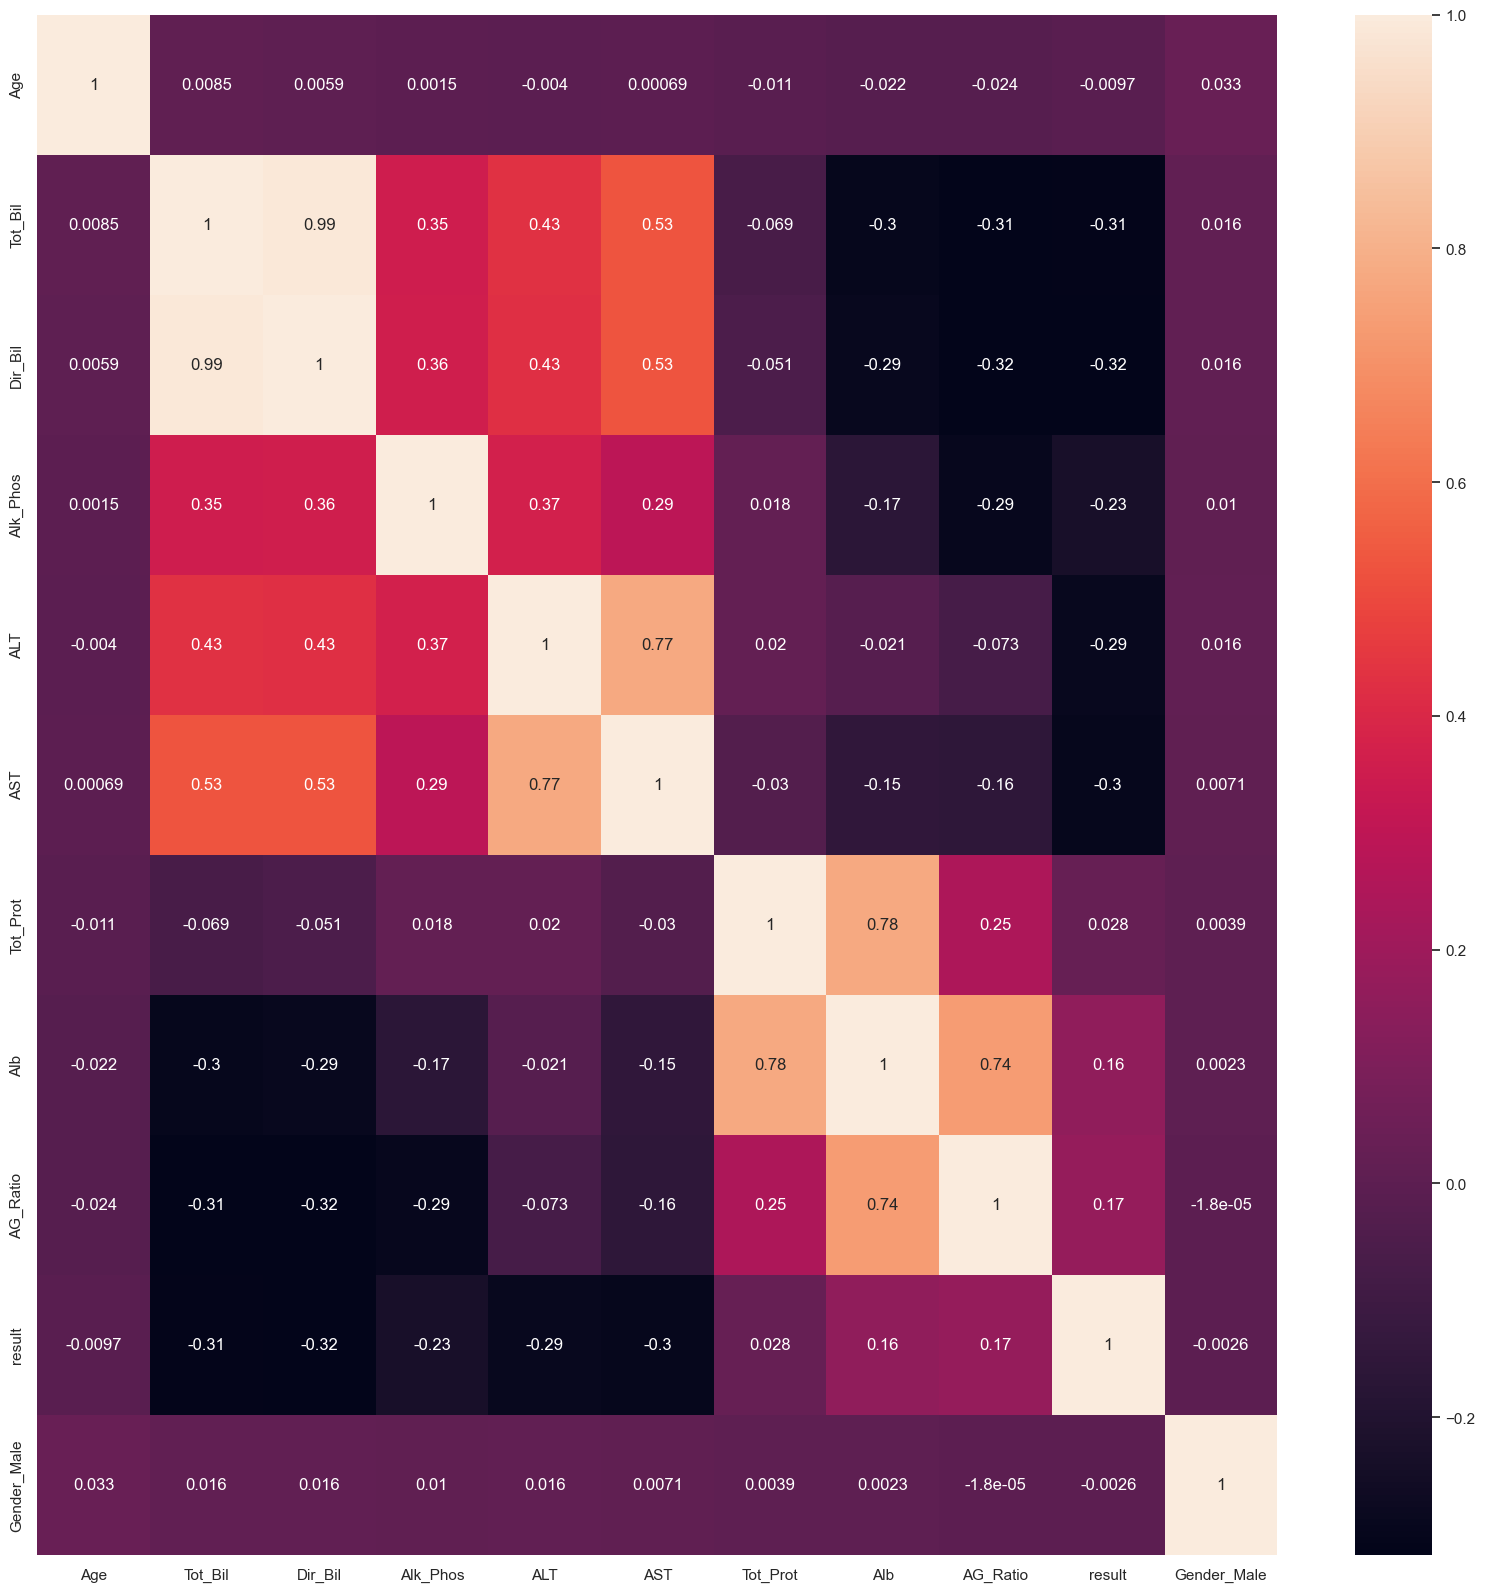

In [79]:
#correlation
plt.figure(figsize=(20,20))
corr=DF.corr()
sns.heatmap(corr,annot=True)

In [80]:
DF.head(10)

,Age,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_Prot,Alb,AG_Ratio,result,Gender_Male
0,65.0,0.70,0.10,187.0,16.0,18.0,6.8,3.3,0.90,1,False
1,62.0,5.55,2.95,482.5,64.0,100.0,7.5,3.2,0.74,1,True
2,62.0,5.55,2.95,482.5,60.0,68.0,7.0,3.3,0.89,1,True
3,58.0,1.00,0.40,182.0,14.0,20.0,6.8,3.4,1.00,1,True
4,72.0,3.90,2.00,195.0,27.0,59.0,7.3,2.4,0.40,1,True
5,46.0,1.80,0.70,208.0,19.0,14.0,7.6,4.4,1.30,1,True
6,26.0,0.90,0.20,154.0,16.0,12.0,7.0,3.5,1.00,1,False
7,29.0,0.90,0.30,202.0,14.0,11.0,6.7,3.6,1.10,1,False
8,17.0,0.90,0.30,202.0,22.0,19.0,7.4,4.1,1.20,2,True
9,55.0,0.70,0.20,290.0,53.0,58.0,6.8,3.4,1.00,1,True


In [81]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27737 entries, 0 to 31273
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          27737 non-null  float64
 1   Tot_Bil      27737 non-null  float64
 2   Dir_Bil      27737 non-null  float64
 3   Alk_Phos     27737 non-null  float64
 4   ALT          27737 non-null  float64
 5   AST          27737 non-null  float64
 6   Tot_Prot     27737 non-null  float64
 7   Alb          27737 non-null  float64
 8   AG_Ratio     27737 non-null  float64
 9   result       27737 non-null  int64  
 10  Gender_Male  27737 non-null  bool   
dtypes: bool(1), float64(9), int64(1)
memory usage: 2.4 MB


In [82]:
#seperate dependent and independent vars
target='result'
X=DF.drop(columns=[target])
y=DF[target]

In [83]:
X

,Age,Tot_Bil,Dir_Bil,Alk_Phos,ALT,AST,Tot_Prot,Alb,AG_Ratio,Gender_Male
0,65.0,0.70,0.10,187.0,16.0,18.0,6.8,3.3,0.90,False
1,62.0,5.55,2.95,482.5,64.0,100.0,7.5,3.2,0.74,True
2,62.0,5.55,2.95,482.5,60.0,68.0,7.0,3.3,0.89,True
3,58.0,1.00,0.40,182.0,14.0,20.0,6.8,3.4,1.00,True
4,72.0,3.90,2.00,195.0,27.0,59.0,7.3,2.4,0.40,True
...,...,...,...,...,...,...,...,...,...,...
31269,50.0,2.20,1.00,482.5,17.0,28.0,7.3,2.6,0.55,True
31270,55.0,2.90,1.30,482.0,22.0,34.0,7.0,2.4,0.50,True
31271,54.0,5.55,2.95,482.5,116.0,66.0,6.4,3.1,0.90,True
31272,48.0,1.90,1.00,231.0,16.0,55.0,4.3,1.6,0.60,False


In [84]:
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    2
9    1
Name: result, dtype: int64

In [85]:
y = y.replace({1: 0, 2: 1}) # 0 normal 1 abnormal
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: result, dtype: int64

In [86]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )

In [87]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)   

In [88]:
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

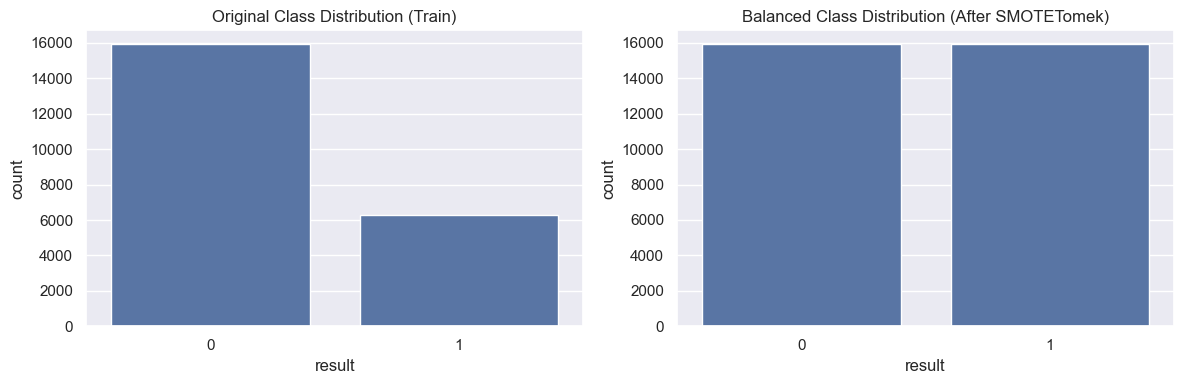

In [89]:
plt.figure(figsize=(12, 4))

# Before resampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Original Class Distribution (Train)")

# After resampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Balanced Class Distribution (After SMOTETomek)")

plt.tight_layout()
plt.show()

In [90]:
print("\nClass counts (Original Training Data):", Counter(y_train))
print("Class counts (Resampled Training Data):", Counter(y_resampled))
print("Class counts (Test Data - Unmodified):", Counter(y_test))


Class counts (Original Training Data): Counter({0: 15913, 1: 6276})
Class counts (Resampled Training Data): Counter({1: 15909, 0: 15909})
Class counts (Test Data - Unmodified): Counter({0: 3979, 1: 1569})


In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
)

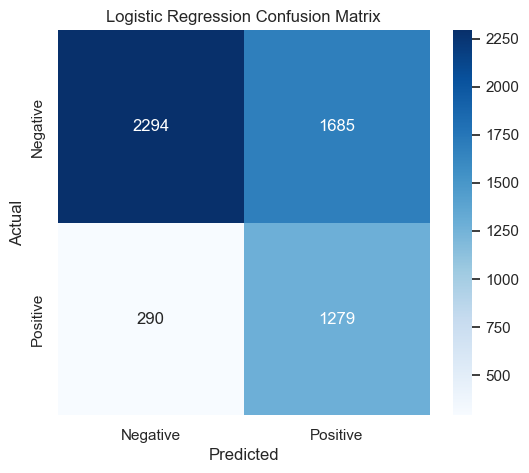

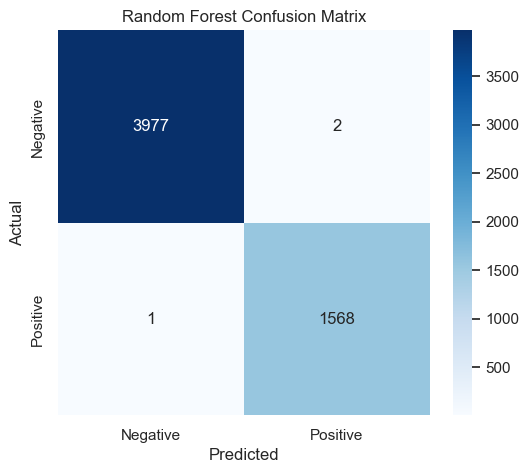

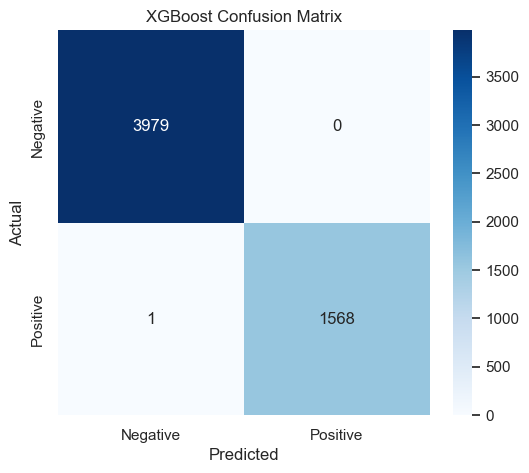

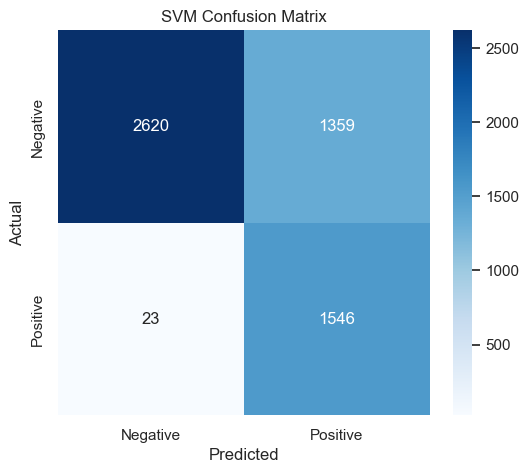

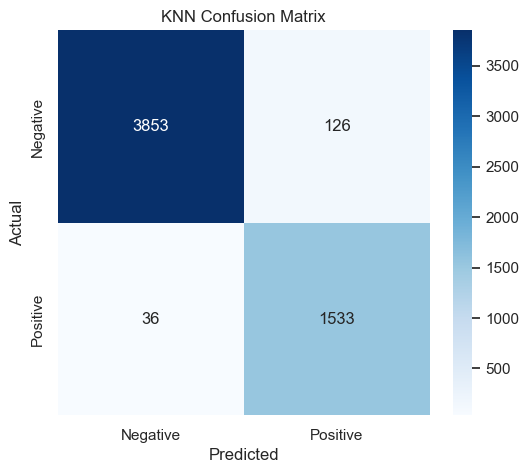

In [95]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "SVM": SVC(probability=True, random_state=42),  # Enable probability for ROC-AUC
    "KNN": KNeighborsClassifier()
}

results = {}

for name, model in models.items():
    # Train on resampled data
    model.fit(X_resampled, y_resampled)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{name} Confusion Matrix')
    plt.show()


In [96]:
results_df = pd.DataFrame(results).T.sort_values(by="ROC-AUC", ascending=False)
print("\nModel Performance:")
print(results_df)


Model Performance:
                     Accuracy  Precision    Recall        F1   ROC-AUC
Random Forest        0.999459   0.998726  0.999363  0.999044  0.999675
XGBoost              0.999820   1.000000  0.999363  0.999681  0.999566
KNN                  0.970800   0.924051  0.977055  0.949814  0.992257
SVM                  0.750901   0.532186  0.985341  0.691104  0.888390
Logistic Regression  0.644016   0.431511  0.815169  0.564306  0.765105


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# Save the trained Random Forest model
joblib.dump(models["Random Forest"], "liver_disease_RF_model.joblib")

# Save the scaler (critical for preprocessing new data)
joblib.dump(scaler, "liver_disease_scaler.joblib")

In [ ]:
import os
print("Model exists:", os.path.exists("liver_disease_rf_model.joblib"))  # Should return True
print("Scaler exists:", os.path.exists("standard_scaler.joblib"))  